# mol 객체 그리드 보기
- mol 객체, 특성 추가, 시각화, 그리드 형태로 보기

# import

In [ ]:
!pip install rdkit mols2grid

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

from rdkit.Chem import PandasTools # 데이터프레임으로 바로 읽기

import mols2grid
import requests
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# 복수의 화합물 다루기

- [SDMolSupplier](https://www.rdkit.org/docs/cppapi/classRDKit_1_1SDMolSupplier.html)을 사용하여 [SD file](https://en.wikipedia.org/wiki/Chemical_table_file)의 내용을 읽는다
- curl: client URL, 인터넷에서 파일을 다운받는 명령어 (wget과 유사한 동작을 한다)
 - 저장할 파일명을 -o 옵션으로 지정한다

In [ ]:
!curl -o example_compounds.sdf https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/example_compounds.sdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  149k  100  149k    0     0   290k      0 --:--:-- --:--:-- --:--:--  290k


In [ ]:
# 파일 읽기
!head -30 example_compounds.sdf

168691 CHEMBL318804
  -OEChem-08072111262D

 39 43  0     0  0  0  0  0  0999 V2000
    7.8251   -4.8028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.8727   -5.1079    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.5577   -6.0575    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5577   -6.0575    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2507   -5.1042    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.0612   -4.5156    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0624   -3.5156    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    5.1969   -3.0146    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1967   -2.0146    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3334   -1.5098    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4615   -2.0101    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4530   -3.0152    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3251   -3.5149    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.

In [ ]:
# 파일 라인수 세기
!cat example_compounds.sdf | wc -l

    3597


In [ ]:
# mol 객체 리스트 만들기
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

In [ ]:
mols[:10]

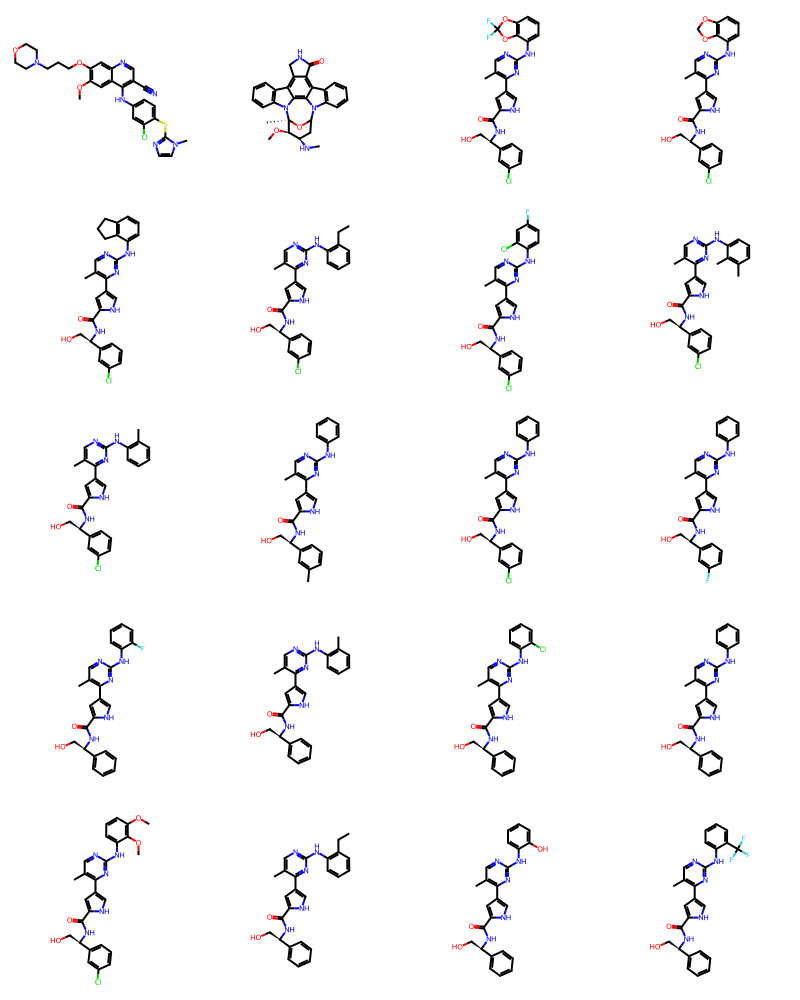

In [ ]:
Draw.MolsToGridImage(mols[:20],molsPerRow=4,useSVG=True)

# [mols2grid](https://github.com/cbouy/mols2grid)

- 그리드 테이블로 보기
- 각 항목을 선택할 수 있고 다양한 보기 옵션을 제공한다

In [ ]:
mols2grid.display(mols)

MolGridWidget()

- 위에서 일부 항목을 선택해본다

In [ ]:
mols2grid.get_selection()

{}

## 데이터프레임으로 읽기

- sdf 파일을 데이터프레임으로 바로 읽기
- mol 객체를 바로 만들어준다
 - LoadSDF() 함수 사용

In [ ]:
df = PandasTools.LoadSDF("example_compounds.sdf")
df[:3]

,ID,ROMol
0,168691 CHEMBL318804,<rdkit.Chem.rdchem.Mol object at 0x7f9720d057b0>
1,86358 CHEMBL162,<rdkit.Chem.rdchem.Mol object at 0x7f9720d05970>
2,575087 CHEMBL576683,<rdkit.Chem.rdchem.Mol object at 0x7f9720d05ba0>


- mols2grid 을 이용하여 그리드 형태로 보기
- mol 객체를 포함하는 컬럼을 지정해주어야 한다
 - 여기서는 ROMol 컬럼에 들어 있다

In [ ]:
mols2grid.display(df,mol_col="ROMol")

MolGridWidget()

# 특성 추가 하기

- 데이터프레임에 특성을 추가하여 그리드로 표시한다

In [ ]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

In [ ]:
df[:3]

,ID,ROMol,MW,LogP
0,168691 CHEMBL318804,<rdkit.Chem.rdchem.Mol object at 0x7f9720d057b0>,565.099,5.49788
1,86358 CHEMBL162,<rdkit.Chem.rdchem.Mol object at 0x7f9720d05970>,466.541,4.35400
2,575087 CHEMBL576683,<rdkit.Chem.rdchem.Mol object at 0x7f9720d05ba0>,527.915,4.96202


- 그리드에 상세정보 추가 표시하기
 - 어떤 컬럼값을 표시할지를 **subset** 변수에 지정한다
 - 이미지는 **"img"** 컬럼에 지정한다
 - **transform** 에 표현 포맷을 지정한다 (딕셔녀리 구조로 변환 정보를 받는다)


In [ ]:
# 소수점 2자리까지 표현하도록 변환하는 함수 정의
two_decimals = lambda x: f"{x:.2f}"

mols2grid.display(df,mol_col="ROMol",subset=["img","MW","LogP"],
                  transform={"MW" : two_decimals, "LogP": two_decimals})

MolGridWidget()